# Import and Load

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Raw ICD-11 

In [76]:
df = pd.read_csv('icd11-25_data_clean_with_generated_descriptions.csv')
df.columns

Index(['id', 'code', 'title', 'browser_url', 'class_kind', 'definition',
       'parent', 'inclusions', 'foundation_children',
       'foundation_child_references', 'index_terms', 'related_entities',
       'full_text', 'children', 'postcoordination_scales',
       'index_term_references', 'exclusions', 'exclusion_references',
       'fully_specified_name', 'generated_description'],
      dtype='object')

Based on the ICD-11 Reference Guide (refguide_ICD11.pdf), here's an explanation of the columns you listed, likely extracted from the ICD-11 API:

1.  **`id`**: This corresponds to the **Uniform Resource Identifier (URI)**. Each entity (disease, disorder, finding, etc.) in the ICD-11 Foundation Component has a unique URI that identifies it regardless of language or context[cite: 324, 3198].
2.  **`code`**: This is the alphanumeric **ICD-11 code** (e.g., 1A00, 9B71.0Z, XA1X49) assigned to categories in a specific tabular list (like the MMS list for mortality and morbidity) or used for extension codes[cite: 103, 311, 312]. Stem codes (from main chapters) can be used alone, while extension codes (starting with 'X') add detail and must be used with a stem code for statistical classification[cite: 566, 336].
3.  **`title`**: This is the standard, preferred name or label for the ICD entity in the given language[cite: 513, 528].
4.  **`browser_url`**: This is likely the direct web address (URL) to view the specific entity in the official WHO ICD-11 online browser[cite: 228, 485]. The `id` (URI) usually forms part of this URL.
5.  **`class_kind`**: This field indicates the type or level of the entity within the ICD-11 structure. More info below.
6.  **`definition`**: This contains the official textual description explaining the meaning and scope of the entity[cite: 2734, 2745, 3163]. The guide distinguishes between a mandatory short description (max 100 words) and optional longer additional information[cite: 2734, 2745].
7.  **`parent`**: This lists the identifier(s) (URI) of the immediate parent(s) of this entity in the ICD-11 hierarchy. While tabular lists are typically mono-hierarchical (one primary parent), the underlying Foundation Component supports multiple parenting (e.g., classifying a disease by both aetiology and anatomical site)[cite: 87, 361, 427, 3149].
8.  **`inclusions`**: These are terms listed under a category title that serve as examples of diagnostic statements or synonyms classified to that category. They help clarify the content and scope of the category but are not exhaustive[cite: 503, 504, 506].
9.  **`foundation_children`**: This likely lists the direct children (more specific entities) of this entity within the comprehensive **Foundation Component** hierarchy[cite: 87, 3157].
10. **`foundation_child_references`**: Contains the identifiers (URIs) for the entities listed in `foundation_children`.
11. **`index_terms`**: These are terms (including synonyms and clinical phrases) found in the ICD-11 Alphabetical Index that lead to this specific entity/code[cite: 355, 479, 3163].
12. **`related_entities`**: While not explicitly defined as a column name in the guide, this likely refers to non-hierarchical relationships defined in the Foundation Component, possibly including links indicated by 'Code also' notes or exclusions.
13. **`full_text`**: This term isn't explicitly defined for a column in the guide. It might be a convenience field concatenating text from the `title`, `definition`, `inclusions`, etc., or it could represent the detailed "Additional Information" (long definition) mentioned in the guide[cite: 2745].
14. **`children`**: This likely lists the direct children of this entity within a *specific tabular list* (like the MMS list), as opposed to `foundation_children` which reflects the broader Foundation structure[cite: 361, 3157]. Tabular lists are often simplified or rearranged versions of the Foundation.
15. **`postcoordination_scales`**: This refers to the specific axes or dimensions (often represented by Extension Codes) that can be combined (postcoordinated) with this entity's stem code to add more detail, such as severity, anatomy, laterality, or causality[cite: 339, 603, 2043].
16. **`index_term_references`**: Contains the identifiers for the terms listed in `index_terms`.
17. **`exclusions`**: These are terms listed under a category that specify conditions classified *elsewhere*. They help define the boundaries of the category[cite: 514, 516].
18. **`exclusion_references`**: Contains the identifiers (URIs/codes) for the conditions listed in `exclusions`.
19. **`fully_specified_name`**: This is the complete, unambiguous title for the entity, designed to be clear without needing hierarchical context, as mentioned on page 317 of the guide[cite: 3179].

**Class Kind** possible types:
* **`chapter`**: The highest level of structural organization in ICD-11. Chapters group broad areas of diseases, disorders, external causes, or other health-related conditions. The first character of an ICD-11 code typically relates to its chapter.
* **`block`**: An intermediate hierarchical grouping of categories within a chapter. Blocks are used for organizing related conditions and can be used for aggregated statistical reporting, but they generally do not have their own specific ICD codes for diagnosing individual cases.
* **`category`**: A specific, codable entry in an ICD-11 tabular list representing a distinct disease, disorder, injury, symptom, external cause, or other health-related problem. Categories are assigned an ICD-11 stem code and are the units used for detailed data recording and statistical analysis.
* **`window`**: A structural element, mentioned in the context of multiple parenting and user guidance (page 45). It allows a set of conditions to be displayed in an alternative hierarchical location (secondary parentage) for Browse or specialty views, without that being its primary classification point. A window in such an alternative location typically has "no primary children, no terms, no residual categories" itself.

## Data Types and Nans

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13960 entries, 0 to 13959
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13960 non-null  int64 
 1   code                         13062 non-null  object
 2   title                        13960 non-null  object
 3   browser_url                  13960 non-null  object
 4   class_kind                   13960 non-null  object
 5   definition                   6894 non-null   object
 6   parent                       13960 non-null  object
 7   inclusions                   1113 non-null   object
 8   foundation_children          1468 non-null   object
 9   foundation_child_references  1468 non-null   object
 10  index_terms                  10855 non-null  object
 11  related_entities             2287 non-null   object
 12  full_text                    13960 non-null  object
 13  children                     32

We substituted the nan values with "" and transformed the content of the variables in string type to analyse the text content

In [105]:
df.loc[df['code'].isna(), 'code'] = ""
df['code'] = df['code'].astype(str)

df.loc[df['title'].isna(), 'title'] = ""
df['title'] = df['title'].astype(str)

df['browser_url'] = df['browser_url'].astype(str)

df['class_kind'] = df['class_kind'].astype(str)

df.loc[df['definition'].isna(), 'definition'] = ""
df['definition'] = df['definition'].astype(str)

df.loc[df['parent']=='mms', 'parent'] = '1000000000'
df['parent'] = df['parent'].astype(int)

df.loc[df['inclusions'].isna(), 'inclusions'] = ""
df['inclusions'] = df['inclusions'].astype(str)

df.loc[df['foundation_children'].isna(), 'foundation_children'] = ""
df['foundation_children'] = df['foundation_children'].astype(str)

df.loc[df['foundation_child_references'].isna(), 'foundation_child_references'] = ""
df['foundation_child_references'] = df['foundation_child_references'].astype(str)

df.loc[df['index_terms'].isna(), 'index_terms'] = ""
df['index_terms'] = df['index_terms'].astype(str)

df.loc[df['related_entities'].isna(), 'related_entities'] = ""
df['related_entities'] = df['related_entities'].astype(str)

df['full_text'] = df['full_text'].astype(str)

def clean_children_str(children_str):
    items = [x.strip() for x in children_str.split(';')]
    return [x for x in items if x not in ['other', 'unspecified']]
df.loc[df['children'].isna(), 'children'] = ""
df['children'] = df['children'].apply(clean_children_str)

df.loc[df['postcoordination_scales'].isna(), 'postcoordination_scales'] = '{}'

df.loc[df['index_term_references'].isna(), 'index_term_references'] = ""
df['index_term_references'] = df['index_term_references'].astype(str)

def clean_exclusions_str(exclusions_str):
    return [x.strip() for x in exclusions_str.split(';')]
df.loc[df['exclusions'].isna(), 'exclusions'] = ""
df['exclusions'] = df['exclusions'].apply(clean_exclusions_str)

df.loc[df['exclusion_references'].isna(), 'exclusion_references'] = ""
df['exclusion_references'] = df['exclusion_references'].astype(str)

df.loc[df['fully_specified_name'].isna(), 'fully_specified_name'] = ""
df['fully_specified_name'] = df['fully_specified_name'].astype(str)

C:\Users\giorg\AppData\Local\Temp\ipykernel_14672\1862654503.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1000000000' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['parent']=='mms', 'parent'] = '1000000000'


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13960 entries, 0 to 13959
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13960 non-null  int64 
 1   code                         13960 non-null  object
 2   title                        13960 non-null  object
 3   browser_url                  13960 non-null  object
 4   class_kind                   13960 non-null  object
 5   definition                   13960 non-null  object
 6   parent                       13960 non-null  int32 
 7   inclusions                   13960 non-null  object
 8   foundation_children          13960 non-null  object
 9   foundation_child_references  13960 non-null  object
 10  index_terms                  13960 non-null  object
 11  related_entities             13960 non-null  object
 12  full_text                    13960 non-null  object
 13  children                     13

## Outliers

Text length varies in relation to the particular disease described, we analyze the values having highest number of word count

In [7]:
df['definition'].str.len().sort_values(ascending=False)[:10]

13440    6083
196      3654
108      2614
523      2224
6114     1827
12545    1724
12433    1608
12718    1550
743      1533
13073    1507
Name: definition, dtype: int64

In [19]:
df.loc[13440, 'definition'] = """ Severity of Vision Impairment Classification. No vision impairment. Eual to or better than: 6/12, 5/10 (0.5), 20/40 (0.3). 1) Mild vision impairment. Worse than: 6/12, 5/10 (0.5), 20/40 (0.3); equal to or better than: 6/18, 3/10 (0.3), 20/70 (0.5). 2) Moderate vision impairment. Worse than: 6/18, 3/10 (0.3), 20/70 (0.5); equal to or better than: 6/60, 1/10 (0.1), 20/200 (1.3). 3) Severe vision impairment. Worse than: 6/60, 1/10 (0.1), 20/200 (1.3); equal to or better than: 3/60, 1/20 (0.05), 20/400 (1.3). 4) Blindness. Worse than: 3/60, 1/20 (0.05), 20/400 (1.3); equal to or better than: 1/60, 1/50 (0.02), 5/300 (20/1200) (1.8). Note: Visual acuity is presented in metres, decimals, feet, and logMar.
"""

The line of code below analyzes the definition column of the DataFrame df to find the ten longest definitions by word count

In [20]:
df['definition'].str.split().str.len().sort_values(ascending=False)[:10]

196      573
108      397
523      339
6114     282
13073    245
12545    237
12433    229
12718    225
12735    223
12222    220
Name: definition, dtype: int64

This line of code identifies the ten definitions in the DataFrame df that contain the most sentences

In [21]:
df['definition'].str.split('.').str.len().sort_values(ascending=False)[:10]

196      35
13440    31
12749    26
523      20
9101     19
743      19
108      19
12538    19
582      19
692      18
Name: definition, dtype: int64

## Definition Quality

Define quality measuring metrics and methods to evaluate descriptions.

### Length

Character length:
 count    13960.000000
mean       154.041619
std        239.326403
min          0.000000
25%          0.000000
50%          0.000000
75%        236.000000
max       6083.000000
Name: definition, dtype: float64 

Words:
 count    13960.000000
mean        22.478009
std         34.305552
min          0.000000
25%          0.000000
50%          0.000000
75%         35.000000
max        573.000000
Name: definition, dtype: float64 

Sentences:
 count    13960.000000
mean         2.190258
std          1.899749
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         35.000000
Name: definition, dtype: float64 



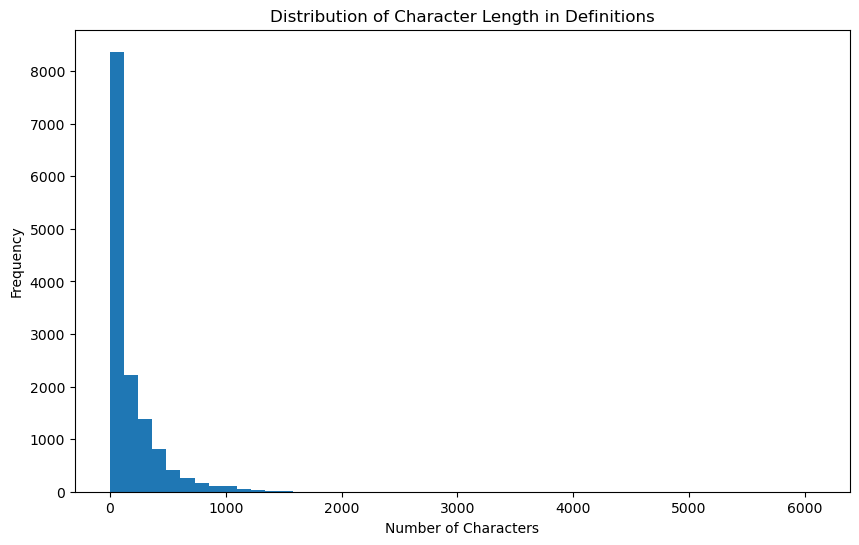

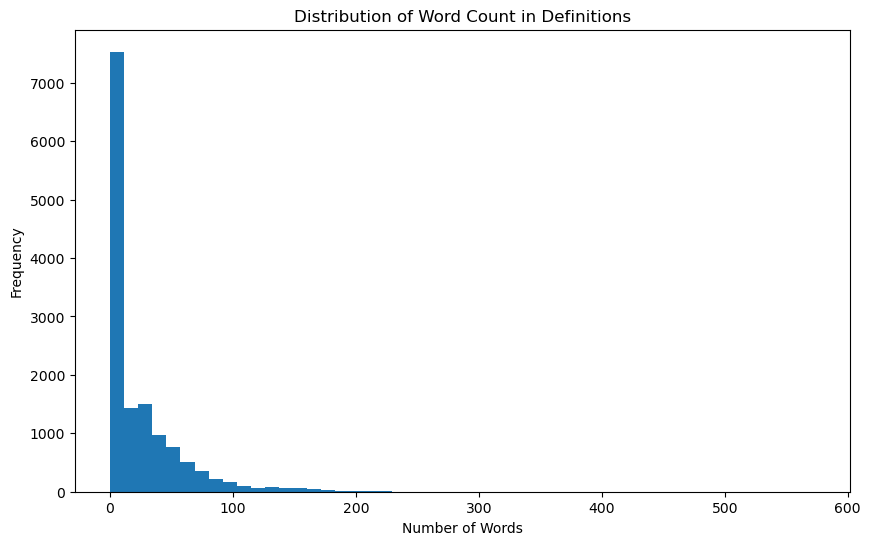

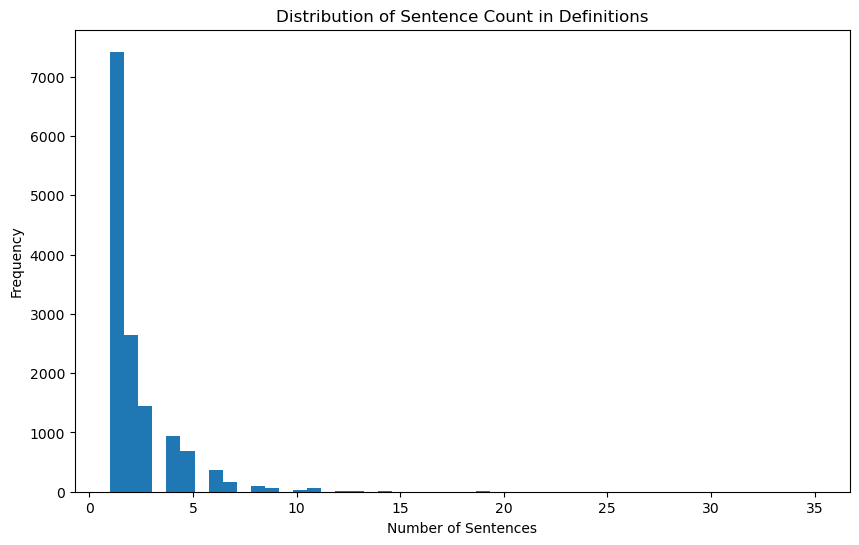

In [8]:
# length description
# character length
print('Character length:\n', df['definition'].str.len().describe(), '\n')

# words
print('Words:\n', df['definition'].str.split().str.len().describe(), '\n')

# sentences
print('Sentences:\n', df['definition'].str.split('.').str.len().describe(), '\n')

# length description
# character length
plt.figure(figsize=(10,6))
plt.hist(df['definition'].str.len(), bins=50)
plt.title('Distribution of Character Length in Definitions')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# words
plt.figure(figsize=(10,6))
plt.hist(df['definition'].str.split().str.len(), bins=50)
plt.title('Distribution of Word Count in Definitions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# sentences
plt.figure(figsize=(10,6))
plt.hist(df['definition'].str.split('.').str.len(), bins=50)
plt.title('Distribution of Sentence Count in Definitions')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

In [9]:
print(df['definition'].iloc[0].replace('. ', '.\n'))

Any condition caused by an infection with the gram-negative bacteria Chlamydia psittaci.
These conditions are characterised by variable clinical presentations such as fever, cough, headaches, chills, fatigue, nausea, vomiting, diarrhoea, or pneumonia.
Transmission is commonly by inhalation of aerosol contaminated with body fluids from infected birds, or direct contact with infected birds.
Confirmation is by identification of Chlamydia psittaci.


### Completeness

This function, add_definition_completeness_scores, evaluates the completeness of medical definitions in a DataFrame by assigning a numerical score to each definition based on the presence of key informational aspects. It first creates a copy of the input DataFrame and adds a new column, completeness, to store the scores.

The function defines several aspects important for a comprehensive medical definition, such as overview, causes, symptoms, transmission, diagnosis, treatment, and prognosis.

In [10]:
def add_definition_completeness_scores(df):
    # Create a copy of the dataframe
    result_df = df.copy()
    
    # Add the new column
    result_df['completeness'] = None
    
    # Define aspects and keywords for scoring
    aspects = {
    'overview': [
        'is a', 'are a', 'defined as', 'refers to', 'condition', 'disease', 'disorder',
        'syndrome', 'illness', 'characterized by', 'affecting', 'occurs when', 'type of',
        'form of', 'group of', 'category of', 'class of', 'classification', 'entity',
        'pathology', 'abnormality', 'problem', 'health issue', 'medical', 'clinical',
        'pathological', 'involves', 'designates', 'term for', 'describes', 'relating to',
        'concerning', 'pertaining to', 'associated with', 'manifested by', 'feature of'
    ],
    'causes': [
        'cause', 'etiology', 'risk factor', 'due to', 'result of', 'caused by', 
        'trigger', 'associated with', 'genetic', 'infection', 'bacteria', 'virus',
        'fungus', 'parasite', 'hereditary', 'environmental', 'exposure', 'origin',
        'source', 'underlying', 'predisposing', 'development', 'derived', 'acquired',
        'congenital', 'induced by', 'secondary to', 'following', 'after', 'linked to',
        'consequence of', 'sequela', 'complication', 'outcome', 'related to', 'response',
        'autoimmune', 'toxin', 'chemical', 'radiation', 'trauma', 'injury', 'defect',
        'mutation', 'deficiency', 'excess', 'pathogen', 'agent', 'mechanism'
    ],
    'symptoms': [
        'symptom', 'sign', 'present with', 'manifests as', 'characterized by', 
        'presentation', 'clinical feature', 'pain', 'fever', 'swelling', 'fatigue',
        'discomfort', 'ache', 'loss', 'impair', 'dysfunction', 'manifestation',
        'complaint', 'report', 'sensation', 'experience', 'feeling', 'suffer',
        'exhibit', 'display', 'show', 'demonstrat', 'express', 'appear', 'develop',
        'progress', 'worsen', 'improve', 'resolve', 'persist', 'severe', 'mild',
        'moderate', 'acute', 'chronic', 'subjective', 'objective', 'visible', 
        'palpable', 'tender', 'redness', 'rash', 'lesion', 'weakness', 'numbness',
        'tingling', 'stiff', 'rigid', 'sore', 'uncomfortable', 'irritat', 'inflam'
    ],
    'transmission': [
        'transmit', 'spread', 'contagious', 'infectious', 'vector', 'airborne',
        'waterborne', 'bloodborne', 'contact', 'carrier', 'contamination', 
        'infected', 'transmitted by', 'spreads through', 'communicable',
        'person-to-person', 'direct', 'indirect', 'fecal-oral', 'droplet',
        'aerosol', 'bodily fluid', 'saliva', 'blood', 'sexual', 'vertical',
        'maternal', 'perinatal', 'breast milk', 'transplacental', 'nosocomial',
        'hospital-acquired', 'community-acquired', 'endemic', 'epidemic', 'pandemic',
        'zoonotic', 'animal', 'insect', 'mosquito', 'tick', 'flea', 'lice', 'parasite',
        'reservoir', 'host', 'incubation', 'shedding'
    ],
    'diagnosis': [
        'diagnos', 'test', 'examination', 'detection', 'screening', 'identified by',
        'laboratory', 'imaging', 'scan', 'blood test', 'confirmed by', 'biopsy',
        'differential', 'assess', 'evaluation', 'workup', 'investigation', 'findings',
        'clinical', 'physical', 'history', 'criteria', 'marker', 'indicator', 'biomarker',
        'analyze', 'measure', 'monitor', 'observe', 'determine', 'identify', 'confirm',
        'rule out', 'exclude', 'distinguish', 'characterize', 'classify', 'categorize',
        'radiograph', 'x-ray', 'CT', 'MRI', 'ultrasound', 'endoscopy', 'culture', 'PCR',
        'serology', 'antibody', 'antigen', 'genetic', 'molecular', 'biopsy', 'specimen',
        'sample', 'tissue', 'fluid', 'urine', 'stool', 'cerebrospinal', 'CSF'
    ],
    'treatment': [
        'treatment', 'therapy', 'intervention', 'management', 'medication', 'drug',
        'surgery', 'therapeutic', 'treated with', 'managed by', 'cure', 'alleviate',
        'relieve', 'regimen', 'protocol', 'approach', 'prevented', 'resolution',
        'heal', 'treat', 'manage', 'control', 'care', 'support', 'palliat', 'remedial',
        'procedure', 'operation', 'technique', 'method', 'antibiotic', 'antiviral',
        'antifungal', 'antimicrobial', 'steroid', 'hormone', 'vaccine', 'immunization',
        'prevention', 'prophylaxis', 'recovery', 'rehabilitation', 'physical therapy',
        'occupational therapy', 'cognitive therapy', 'behavioral therapy', 'psychotherapy',
        'counseling', 'dietary', 'nutrition', 'lifestyle', 'modification', 'complementary',
        'alternative', 'traditional', 'response', 'prognosis', 'outcome', 'remission',
        'follow-up', 'monitoring', 'maintenance', 'long-term'
    ],
    # Additional aspect to capture complication and prognosis information
    'prognosis': [
        'prognosis', 'outlook', 'course', 'progression', 'complication', 'sequela',
        'mortality', 'morbidity', 'survival', 'fatal', 'life expectancy', 'chronic',
        'relapse', 'recur', 'remission', 'resolve', 'improve', 'deteriorate', 'worsen',
        'permanent', 'temporary', 'reversible', 'irreversible', 'disability', 'impairment',
        'function', 'quality of life', 'burden', 'risk', 'chance', 'likelihood', 'percent',
        'rate', 'common', 'rare', 'frequent', 'occasional', 'variable', 'unpredictable'
    ]
    }   
    # Process each row
    print("Calculating definition completeness scores...")
    for idx, row in tqdm(result_df.iterrows(), total=len(result_df)):
        definition = row['definition']
        
        # Handle empty definitions
        if not definition or definition == "":
            result_df.at[idx, 'completeness'] = 0
            continue
            
        # Convert to lowercase for case-insensitive matching
        text = definition.lower()
        
        # Calculate scores for each aspect
        component_scores = {}
        for aspect, keywords in aspects.items():
            # Count keyword matches
            matches = sum(1 for keyword in keywords if keyword in text)
            
            # Score this aspect (0-100)
            if matches >= 3:
                aspect_score = 100
            else:
                aspect_score = (matches / 3) * 100
                
            component_scores[aspect] = aspect_score
        
        # Calculate total score (average of all aspect scores)
        total_score = sum(component_scores.values()) / len(aspects)
        
        # Add length bonus (longer definitions tend to be more complete)
        sentences = [s.strip() for s in definition.split('.') if s.strip()]
        sentence_count = len(sentences)
        
        length_bonus = min(10, (sentence_count / 5) * 10)
        total_score = min(100, total_score * (1 + length_bonus/100))
        
        # Store in dataframe
        result_df.at[idx, 'completeness'] = round(total_score, 1)
    
    # Print statistics
    print(f"Completeness scores added for {len(result_df)} definitions")
    print("\nCompleteness Score Statistics:")
    print(f"Mean: {result_df['completeness'].mean():.2f}")
    print(f"Median: {result_df['completeness'].median():.2f}")
    print(f"Min: {result_df['completeness'].min():.2f}")
    print(f"Max: {result_df['completeness'].max():.2f}")
    
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(result_df['completeness'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Definition Completeness Scores')
    plt.xlabel('Completeness Score (0-100)')
    plt.ylabel('Number of Definitions')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    return result_df

Calculating definition completeness scores...


100%|██████████| 13960/13960 [00:01<00:00, 7672.63it/s] 


Completeness scores added for 13960 definitions

Completeness Score Statistics:
Mean: 13.71
Median: 0.00
Min: 0.00
Max: 100.00


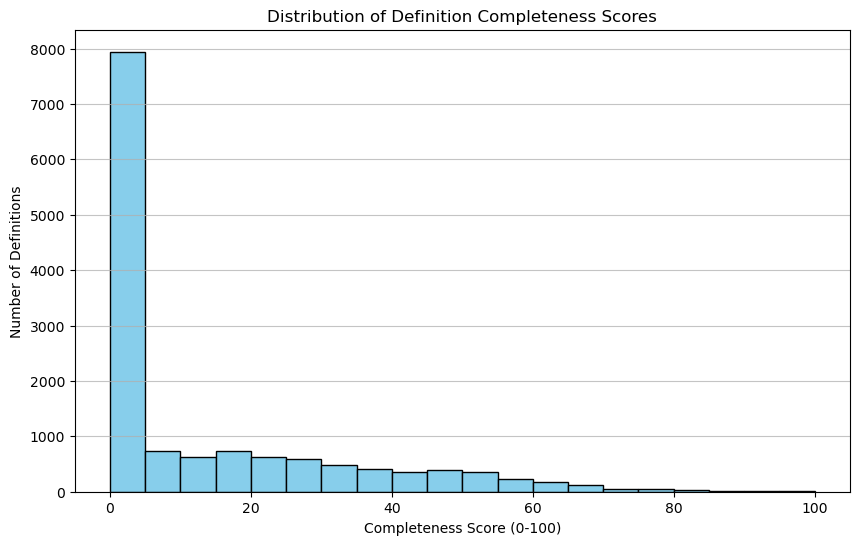

In [77]:
df_with_completeness = add_definition_completeness_scores(df)

In [81]:
#find the row with the highest completeness score
highest_completeness_row = df_with_completeness.loc[df_with_completeness['completeness'].idxmax()]
print(highest_completeness_row[['definition', 'completeness']])


definition      A disease caused by an infection with Rift Val...
completeness                                                  100
Name: 196, dtype: object


## Empty Values

In [26]:
print("Missing values per column:")
for col in df.columns:
    perc_empty = df[df[col]==""].shape[0]/df.shape[0]
    print(f"{col}: {perc_empty:.2%}")

Missing values per column:
id: 0.00%
code: 6.43%
title: 0.00%
browser_url: 0.00%
class_kind: 0.00%
definition: 50.62%
parent: 0.00%
inclusions: 92.03%
foundation_children: 89.48%
foundation_child_references: 89.48%
index_terms: 22.24%
related_entities: 83.62%
full_text: 0.00%
children: 0.00%
postcoordination_scales: 0.00%
index_term_references: 72.74%
exclusions: 0.00%
exclusion_references: 82.95%
fully_specified_name: 99.36%
generated_description: 0.00%


In [28]:
df.head()

,id,code,title,browser_url,class_kind,definition,parent,inclusions,foundation_children,foundation_child_references,index_terms,related_entities,full_text,children,postcoordination_scales,index_term_references,exclusions,exclusion_references,fully_specified_name,generated_description
0,1937339080,1C22,Infections due to Chlamydia psittaci,https://icd.who.int/browse/2025-01/mms/en#1937...,category,Any condition caused by an infection with the ...,1127435854,Psittacosis; Ornithosis; Parrot fever,Pneumonia in chlamydia psittaci infection,Pneumonia in chlamydia psittaci infection: htt...,Infections due to Chlamydia psittaci; Psittaco...,1935107489,Infections due to Chlamydia psittaci Any condi...,[],{},,[],,,"Infections due to Chlamydia psittaci, also kno..."
1,1671640403,1F51.0,Gambiense trypanosomiasis,https://icd.who.int/browse/2025-01/mms/en#1671...,category,A disease caused by an infection with the prot...,875488052,West African sleeping sickness; Infection due ...,,,,1945127438,Gambiense trypanosomiasis A disease caused by ...,"[1842725899, ]","{'axis_name': 'hasManifestation', 'required': ...",,[],,,"Gambiense trypanosomiasis, also known as West ..."
2,1528414070,1A07,Typhoid fever,https://icd.who.int/browse/2025-01/mms/en#1528...,category,A condition caused by an infection with the gr...,135352227,,,,,911707612,Typhoid fever A condition caused by an infecti...,"[364534567, ]","{'axis_name': 'hasManifestation', 'required': ...",,[],,,Typhoid fever is an infectious disease caused ...
3,328097188,1A36.12,Cutaneous amoebiasis,https://icd.who.int/browse/2025-01/mms/en#3280...,category,,1777228366,,,,Cutaneous amoebiasis; Amoebiasis of skin; Amoe...,911707612,Cutaneous amoebiasis Cutaneous amoebiasis; Amo...,[],{},,[],,,Cutaneous amoebiasis is a parasitic infection ...
4,1483190070,1D03,Infectious abscess of the central nervous system,https://icd.who.int/browse/2025-01/mms/en#1483...,category,A focal suppurative process of the brain paren...,1585949804,,,,,911707612,Infectious abscess of the central nervous syst...,"[443087096, 613341872, 1147230459, 1128677700,...","{'axis_name': 'specificAnatomy', 'required': '...",,[],,,Infectious abscess of the central nervous syst...


## Hierarchical analysis

In [77]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [78]:
len(df)

13960

In [109]:
G = nx.DiGraph()

# Add nodes and edges
for _, row in df.iterrows():
    node_id = row['id']
    parent_id = row['parent']
    title = row['title']
    G.add_node(node_id, label=title)
    if pd.notna(parent_id) and parent_id != node_id:
        G.add_edge(parent_id, node_id)

In [110]:
# Compute Depth (Level) of Each Node

# Remove the first node (root) from the graph
"""first_node = roots[0]
G.remove_node(first_node)"""

# Recompute roots after removal
roots = [n for n in G.nodes if G.in_degree(n) == 0]
print(f"Number of root nodes: {len(roots)}")
G.remove_node(first_node)
# Get the root node's label 
roots = [n for n in G.nodes if G.in_degree(n) == 0]
print(f"Number of root nodes after removing first node: {len(roots)}")
depths = {}
for root in roots:
    for node, depth in nx.single_source_shortest_path_length(G, root).items():
        depths[node] = depth

depth_values = list(depths.values())
depth_distribution = Counter(depth_values)
max_depth = max(depth_values)
avg_depth = sum(depth_values) / len(depth_values)

# -----------------------
# STEP 4: Branching Factor (Children per Node)
# -----------------------
child_counts = {node: len(list(G.successors(node))) for node in G.nodes}
internal_nodes = {node: count for node, count in child_counts.items() if count > 0}
leaf_nodes = [node for node, count in child_counts.items() if count == 0]

max_branching_factor = max(child_counts.values())
avg_branching_factor = sum(internal_nodes.values()) / len(internal_nodes) if internal_nodes else 0

# -----------------------
# STEP 5: Subtree Sizes
# -----------------------
subtree_sizes = {node: len(nx.descendants(G, node)) for node in G.nodes}
largest_subtree_node = max(subtree_sizes, key=subtree_sizes.get)
largest_subtree_size = subtree_sizes[largest_subtree_node]
largest_subtree_label = G.nodes[largest_subtree_node].get('label', 'Unknown')

# -----------------------
# STEP 6: Connectivity Checks
# -----------------------
num_weakly_connected_components = nx.number_weakly_connected_components(G)
num_strongly_connected_components = nx.number_strongly_connected_components(G)

# -----------------------
# STEP 7: Print Metrics
# -----------------------
metrics = {
    "Total nodes": len(G.nodes),
    "Root nodes": len(roots),
    "Internal nodes": len(internal_nodes),
    "Leaf nodes": len(leaf_nodes),
    "Max depth": max_depth,
    "Average depth": round(avg_depth, 2),
    "Depth distribution": dict(depth_distribution),
    "Max branching factor": max_branching_factor,
    "Average branching factor": round(avg_branching_factor, 2), 
    "Largest subtree size": largest_subtree_size,
    "Node with largest subtree": largest_subtree_label,
    "Disconnected components (weak)": num_weakly_connected_components,
    "Disconnected components (strong)": num_strongly_connected_components,
}

for k, v in metrics.items():
    print(f"{k}: {v}")

Number of root nodes: 1
Number of root nodes after removing first node: 26
Total nodes: 13960
Root nodes: 26
Internal nodes: 3282
Leaf nodes: 10678
Max depth: 8
Average depth: 3.54
Depth distribution: {0: 26, 1: 269, 2: 1706, 3: 4696, 4: 4953, 5: 2077, 6: 208, 7: 21, 8: 4}
Max branching factor: 38
Average branching factor: 4.25
Largest subtree size: 1424
Node with largest subtree: Injury, poisoning or certain other consequences of external causes
Disconnected components (weak): 26
Disconnected components (strong): 13960


In [111]:
mediandepth = np.median(depth_values)
print(f"Median depth: {mediandepth}")
medianbranching = np.median(list(child_counts.values()))
print(f"Median branching factor: {medianbranching}")

Median depth: 4.0
Median branching factor: 0.0


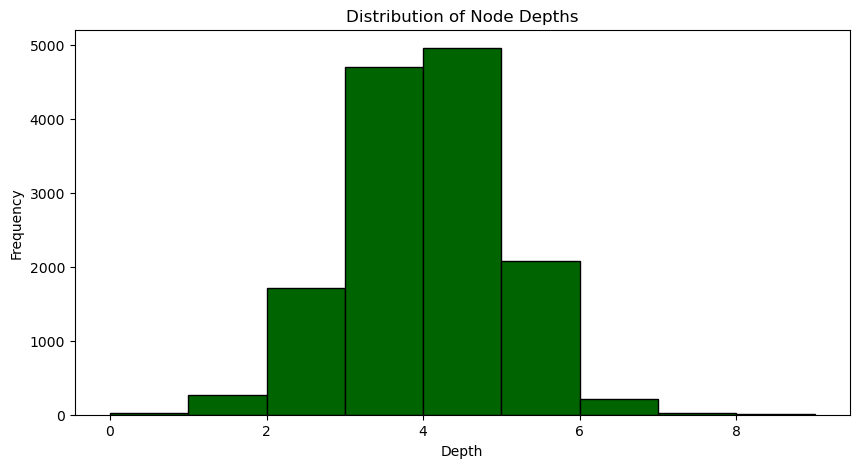

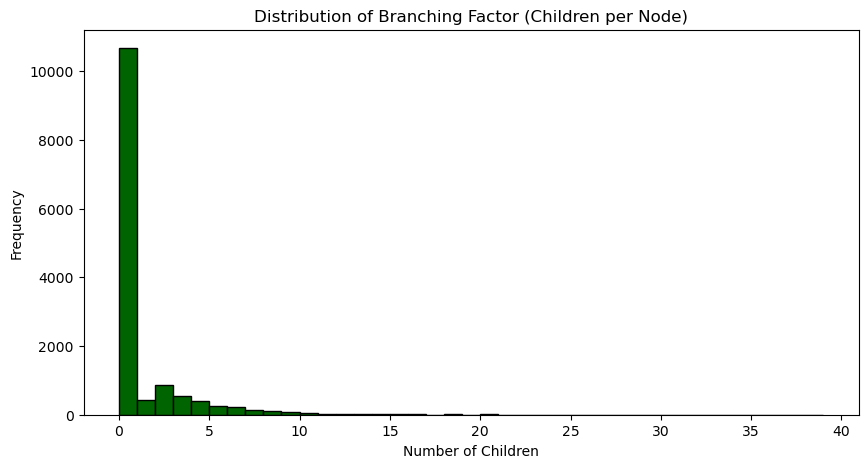

In [61]:
#Plot the most interesting metrics
# Plot the distribution of depth values
import matplotlib.pyplot as plt

# Histogram of node depths (Primary color)
plt.figure(figsize=(10, 5))
plt.hist(depth_values, bins=range(min(depth_values), max(depth_values) + 2), 
         edgecolor='black', color='#006400')
plt.title('Distribution of Node Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

# Histogram of branching factor (Secondary color)
plt.figure(figsize=(10, 5))
plt.hist(list(child_counts.values()), bins=range(0, max(child_counts.values()) + 2), 
         edgecolor='black', color='#006400')
plt.title('Distribution of Branching Factor (Children per Node)')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()




Majority of nodes are leaf nodes without children

In [ ]:
# Find the node(s) with the maximum branching factor
max_branching_nodes = [node for node, count in child_counts.items() if count == max_branching_factor]

# Get their titles from the graph (if stored as node attribute 'label')
for node in max_branching_nodes:
    print(f"Node ID: {node}, Title: {G.nodes[node].get('label', 'Unknown')}")


Node ID: 1233380430, Title: Body constitution and temperament patterns (TM2)


In [68]:
list_strong_components = nx.number_strongly_connected_components(G)


The root node is the introductory title
The depth distribution peaks at 4 nodes
Max branching factor: 38, is the node with most outgoing nodes

## Explore similarities along the branches of the tree

In [12]:
#Creation of the embedding for the title
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

df['title'] = df['title'].fillna("")
df['embedding'] = df['title'].apply(lambda x: model.encode(x, convert_to_tensor=True))


In [13]:
# Calculation of similarities parent-child
from sentence_transformers.util import cos_sim

# Build a list of (parent, child, similarity) triples
similarities = []

id_to_embedding = dict(zip(df['id'], df['embedding']))
id_to_title = dict(zip(df['id'], df['title']))
id_to_parent = dict(zip(df['id'], df['parent']))

for child_id, parent_id in id_to_parent.items():
    if child_id == parent_id or pd.isna(parent_id):
        continue
    if child_id not in id_to_embedding or parent_id not in id_to_embedding:
        continue

    sim = cos_sim(id_to_embedding[child_id], id_to_embedding[parent_id]).item()
    similarities.append({
        'parent_id': parent_id,
        'parent_title': id_to_title.get(parent_id, ""),
        'child_id': child_id,
        'child_title': id_to_title.get(child_id, ""),
        'similarity': sim
    })


In [14]:
sim_df = pd.DataFrame(similarities)

# Example: mean similarity per parent
summary = sim_df.groupby('parent_title')['similarity'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
print(summary)


                                                        mean       std  count
parent_title                                                                 
Pulmonary cysts in newborn                          0.989097       NaN      1
Traumatic amputation of breast                      0.981887  0.003626      2
Symptoms, signs or clinical findings of ear or ...  0.979905       NaN      1
Drug-induced or toxic liver disease with choles...  0.978354       NaN      1
Failed or difficult intubation during the puerp...  0.977392  0.012282      2
...                                                      ...       ...    ...
Structural developmental anomalies of facial bones  0.067712  0.026074      2
Module I                                            0.057946  0.008649      2
Vitamin B3 deficiency                               0.028646       NaN      1
Other effects of reduced temperature               -0.013373  0.003801      2
Conditions of uncertain aetiology and emergency... -0.039254    

In [15]:
#lowest score
summary.sort_values('mean', ascending=True).head(10)

,mean,std,count
parent_title,,,
Conditions of uncertain aetiology and emergency use,-0.039254,NaN,1
Other effects of reduced temperature,-0.013373,0.003801,2
Vitamin B3 deficiency,0.028646,NaN,1
Module I,0.057946,0.008649,2
Structural developmental anomalies of facial bones,0.067712,0.026074,2
Spinal epiphysiopathy with determinants,0.079439,0.062224,3
Ascites,0.089658,NaN,1
Supplementary Chapter Traditional Medicine Conditions,0.090689,0.077804,2
Acquired changes in hair colour,0.106445,0.110527,2


Example: Other effects of reduced temperature leads to ( NF03.0 Chilblains
 NF03.1 Immersion hand or foot
 NF03.Y Other specified effects of reduced temperature
 NF03.Z Unspecified effects of reduced temperature) very different child nodes

 This is often because some codes just present general descriptions of the related diseases which have much more specific names 

The dataframe descibes how much each node is similar to the child node to understand if there are major variations going down the tree

In [52]:
sim_df['similarity'].describe()

count    13934.000000
mean         0.636171
std          0.209934
min         -0.039254
25%          0.495020
50%          0.669755
75%          0.805610
max          0.995659
Name: similarity, dtype: float64

Text(0, 0.5, 'Frequency')

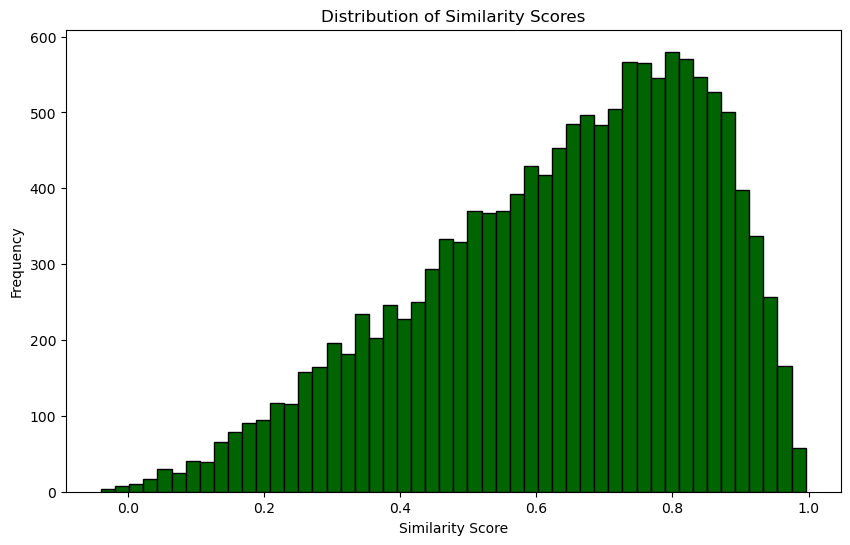

In [60]:
# Plot the distribution of the similarity scores
plt.figure(figsize=(10, 6))
plt.hist(sim_df['similarity'], bins=50, color='#006400', edgecolor='black')
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')

The similarity between parent and child seem to be coherent to what we would expect, only slightly modifications of the original nodes are passed to the children

In [18]:
sim_df  

,parent_id,parent_title,child_id,child_title,similarity
0,1127435854,Other diseases due to chlamydiae,1937339080,Infections due to Chlamydia psittaci,0.746446
1,875488052,African trypanosomiasis,1671640403,Gambiense trypanosomiasis,0.849245
2,135352227,Bacterial intestinal infections,1528414070,Typhoid fever,0.316121
3,1777228366,Extraintestinal infections due to Entamoeba,328097188,Cutaneous amoebiasis,0.369158
4,1585949804,Non-viral and unspecified infections of the ce...,1483190070,Infectious abscess of the central nervous system,0.759952
...,...,...,...,...,...
13929,973190159,Disorders of extraocular muscles,1291786130,Restrictive ophthalmopathy,0.384025
13930,73229602,Disorders of eyelid or peri-ocular area,67586876,Movement disorders of eyelid,0.753845
13931,1259721857,Hordeolum,522397394,Hordeolum externum,0.879040
13932,1006882070,Diabetic retinopathy,417759842,Nonproliferative diabetic retinopathy,0.936556


### Similarity between the main nodes in the apex of the tree and the final nodes

In [19]:
# Extracting the nodes with no outgoing edges (leaf nodes)
last_children = [node for node, degree in G.out_degree() if degree == 0]


In [20]:
id_to_embedding = dict(zip(df['id'], df['embedding']))

In [22]:
# Calculation of the similairty betwene main nodes and last children
cosin_sim_root_children = []
for root_id in roots:
    for leaf_id in last_children:
        sim = cos_sim(id_to_embedding[root_id], id_to_embedding[leaf_id]).item()
        cosin_sim_root_children.append([
            root_id,
            df.loc[df['id'] == root_id, 'title'].values[0] if root_id in df['id'].values else "",
            leaf_id,
            df.loc[df['id'] == leaf_id, 'title'].values[0] if leaf_id in df['id'].values else "",
            sim
        ])
    


In [23]:
# Assuming cosin_sim_root_children is a list of lists like:
# [root_id, root_title, leaf_id, leaf_title, similarity]
df_sim_root_leaves = pd.DataFrame(
    cosin_sim_root_children,
    columns=["root_id", "root_title", "leaf_id", "leaf_title", "similarity"]
)

# Now you can display, sort, or filter the DataFrame as needed
print(df_sim_root_leaves.head())

      root_id                                root_title     leaf_id  \
0  1435254666  Certain infectious or parasitic diseases  1937339080   
1  1435254666  Certain infectious or parasitic diseases   328097188   
2  1435254666  Certain infectious or parasitic diseases  1056849595   
3  1435254666  Certain infectious or parasitic diseases   181304776   
4  1435254666  Certain infectious or parasitic diseases   813571137   

                                          leaf_title  similarity  
0               Infections due to Chlamydia psittaci    0.399305  
1                               Cutaneous amoebiasis    0.393624  
2  Acute miliary tuberculosis of a single specifi...    0.380723  
3                  Parasitic or protozoal meningitis    0.715034  
4                        Subcutaneous dirofilariasis    0.366953  


In [56]:
df.columns

Index(['id', 'code', 'title', 'browser_url', 'class_kind', 'definition',
       'parent', 'inclusions', 'foundation_children',
       'foundation_child_references', 'index_terms', 'related_entities',
       'full_text', 'children', 'postcoordination_scales',
       'index_term_references', 'exclusions', 'exclusion_references',
       'fully_specified_name', 'generated_description', 'is_root', 'is_leaf',
       'node_type'],
      dtype='object')

Verifying which branch has most/least similarity between main node and last leave

In [27]:
summary_root_leaves = df_sim_root_leaves.groupby('root_title')['similarity'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

In [28]:
summary_root_leaves

,mean,std,count
root_title,,,
Diseases of the musculoskeletal system or connective tissue,0.192648,0.108325,10678
Diseases of the skin,0.192305,0.123880,10678
Diseases of the visual system,0.191643,0.102650,10678
"Symptoms, signs or clinical findings, not elsewhere classified",0.190210,0.085305,10678
Diseases of the ear or mastoid process,0.184086,0.098024,10678
Diseases of the circulatory system,0.182786,0.095008,10678
Certain infectious or parasitic diseases,0.182331,0.116341,10678
Neoplasms,0.177839,0.107683,10678
Diseases of the digestive system,0.173788,0.115066,10678


Text(0.5, 1.0, 'Mean Similarity between Root Nodes and Leaf Nodes')

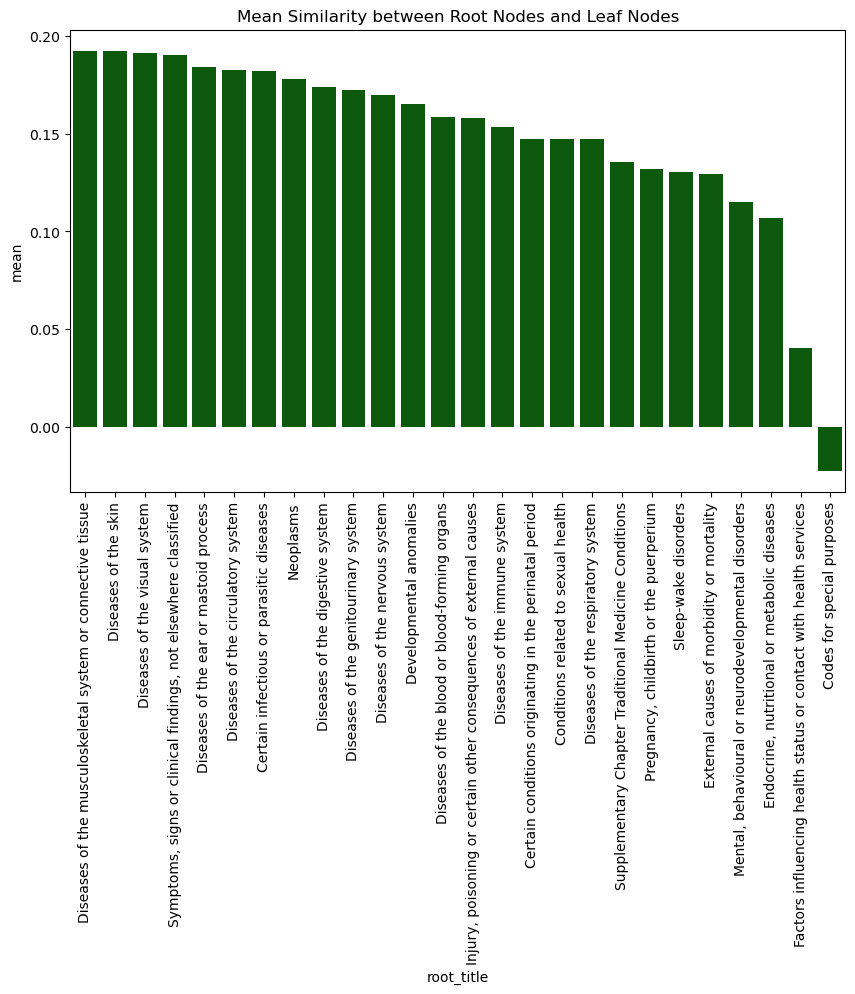

In [62]:
#I want to plot the mean of similarity for each root node
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_root_leaves.index, y=summary_root_leaves['mean'], color='#006400')
plt.xticks(rotation=90)     
plt.title('Mean Similarity between Root Nodes and Leaf Nodes')


### POS analysis

In [39]:
#!pip install spacy==3.7.2 --timeout 100
#!python -m spacy download en_core_web_sm

  Using cached spacy-3.7.2-cp39-cp39-win_amd64.whl.metadata (26 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp39-cp39-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp39-cp39-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.9-cp39-cp39-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.5-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached blis-0.7.11-cp39-cp39-win_amd64.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.2 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/12.2 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/12.2 MB 2.3 MB/s 

In [49]:
#I want to see the difference in the distribution of POS between root nodes and leaf nodes
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def get_pos_distribution(text):
    doc = nlp(text)
    pos_counts = Counter(token.pos_ for token in doc)
    return pos_counts



In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Get root and leaf node ids
root_ids = set(roots)
leaf_ids = set(leaf_nodes)

# Get definitions for roots and leaves
root_defs = df[df['id'].isin(root_ids)]['definition'].dropna().astype(str)
leaf_defs = df[df['id'].isin(leaf_ids)]['definition'].dropna().astype(str)

# Count POS for roots
root_pos_counter = Counter()
for text in root_defs:
    root_pos_counter.update(get_pos_distribution(text))

# Count POS for leaves
leaf_pos_counter = Counter()
for text in leaf_defs:
    leaf_pos_counter.update(get_pos_distribution(text))

# Normalize counts to frequencies
def normalize(counter):
    total = sum(counter.values())
    return {k: v / total for k, v in counter.items()}

root_pos_freq = normalize(root_pos_counter)
leaf_pos_freq = normalize(leaf_pos_counter)

# Combine for plotting
all_tags = sorted(set(root_pos_freq) | set(leaf_pos_freq))
root_freqs = [root_pos_freq.get(tag, 0) for tag in all_tags]
leaf_freqs = [leaf_pos_freq.get(tag, 0) for tag in all_tags]



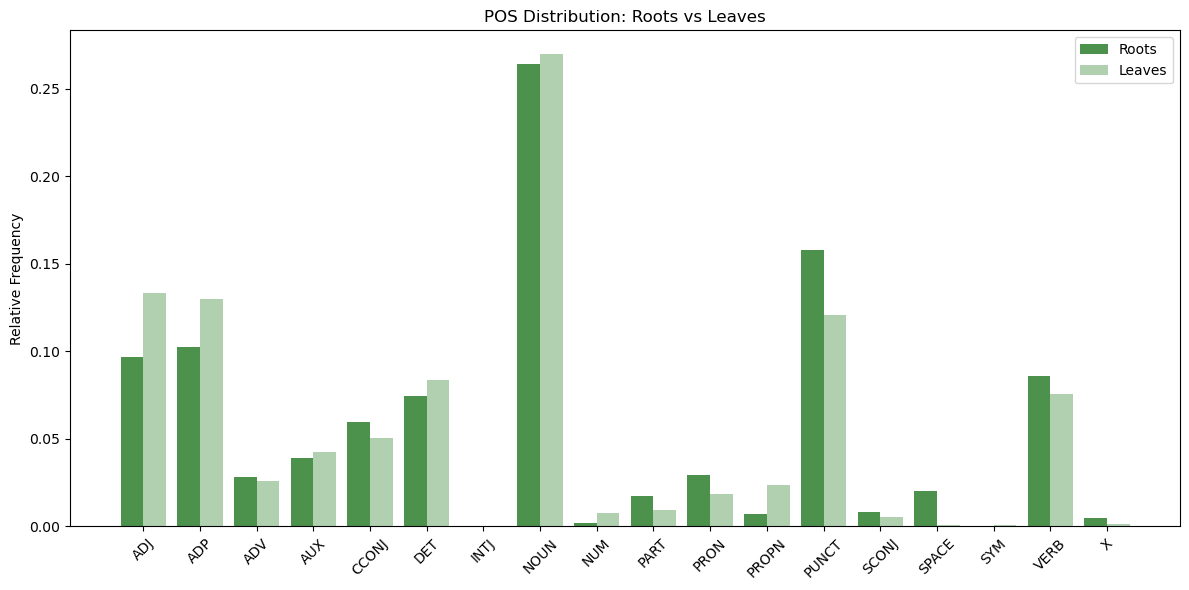

In [63]:
x = range(len(all_tags))
plt.figure(figsize=(12,6))
plt.bar(x, root_freqs, width=0.4, label='Roots', align='center', alpha=0.7,color='#006400')
plt.bar([i+0.4 for i in x], leaf_freqs, width=0.4, label='Leaves', align='center', alpha=0.7, color='#8FBC8F')
plt.xticks([i+0.2 for i in x], all_tags, rotation=45)
plt.ylabel('Relative Frequency')
plt.title('POS Distribution: Roots vs Leaves')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#t test to compare the means of the two distributions for each POS tag



In [54]:
from scipy.stats import ttest_ind

# Get all POS tags present in either roots or leaves
all_tags = sorted(set(root_pos_freq) | set(leaf_pos_freq))

# Prepare lists of POS counts per definition for roots and leaves
def get_pos_counts_per_def(defs):
    counts_per_def = []
    for text in defs:
        pos_counts = get_pos_distribution(text)
        counts_per_def.append(pos_counts)
    return counts_per_def

root_counts_per_def = get_pos_counts_per_def(root_defs)
leaf_counts_per_def = get_pos_counts_per_def(leaf_defs)

# For each POS tag, collect the counts per definition
results = []
for tag in all_tags:
    root_tag_counts = [c.get(tag, 0) for c in root_counts_per_def]
    leaf_tag_counts = [c.get(tag, 0) for c in leaf_counts_per_def]
    # Perform t-test (unequal variances)
    t_stat, p_val = ttest_ind(root_tag_counts, leaf_tag_counts, equal_var=False)
    results.append({'POS': tag, 't_stat': t_stat, 'p_value': p_val})

# Show results as DataFrame
ttest_df = pd.DataFrame(results).sort_values('p_value')
print(ttest_df)

      POS     t_stat       p_value
15    SYM -11.736337  1.297667e-31
6    INTJ  -3.442985  5.775393e-04
10   PRON   2.263122  3.255884e-02
4   CCONJ   2.241097  3.412911e-02
7    NOUN   2.133477  4.286461e-02
12  PUNCT   2.130239  4.316594e-02
16   VERB   1.961915  6.098610e-02
14  SPACE   1.866050  7.380876e-02
17      X   1.751849  9.204701e-02
5     DET   1.640771  1.133485e-01
9    PART   1.640196  1.134827e-01
2     ADV   1.589672  1.244600e-01
1     ADP   1.385784  1.780285e-01
13  SCONJ   1.333075  1.945188e-01
8     NUM  -1.227874  2.306560e-01
0     ADJ   1.176924  2.502839e-01
3     AUX   1.103527  2.802993e-01
11  PROPN  -1.061152  2.986579e-01
